In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Titanic-Dataset.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
display(data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Check for missing values
print(data.isnull().sum())

# Fill missing 'Age' values with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop rows where 'Cabin' is missing (optional)
data.drop(columns='Cabin', inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


C:\Users\skche\AppData\Local\Temp\ipykernel_8740\3408365904.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\skche\AppData\Local\Temp\ipykernel_8740\3408365904.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [5]:
import numpy as np

# Define a function to cap outliers
def cap_outliers(series, lower_quantile=0.05, upper_quantile=0.95):
    lower_bound = series.quantile(lower_quantile)
    upper_bound = series.quantile(upper_quantile)
    series = np.where(series < lower_bound, lower_bound, series)
    series = np.where(series > upper_bound, upper_bound, series)
    return series

# Cap outliers in 'Fare'
data['Fare'] = cap_outliers(data['Fare'])

In [6]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale 'Age' and 'Fare'
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

In [7]:
# One-hot encode 'Sex' and 'Embarked'
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [8]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data.drop(columns='Survived')
y = data['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

IndexError: index 0 is out of bounds for axis 0 with size 0

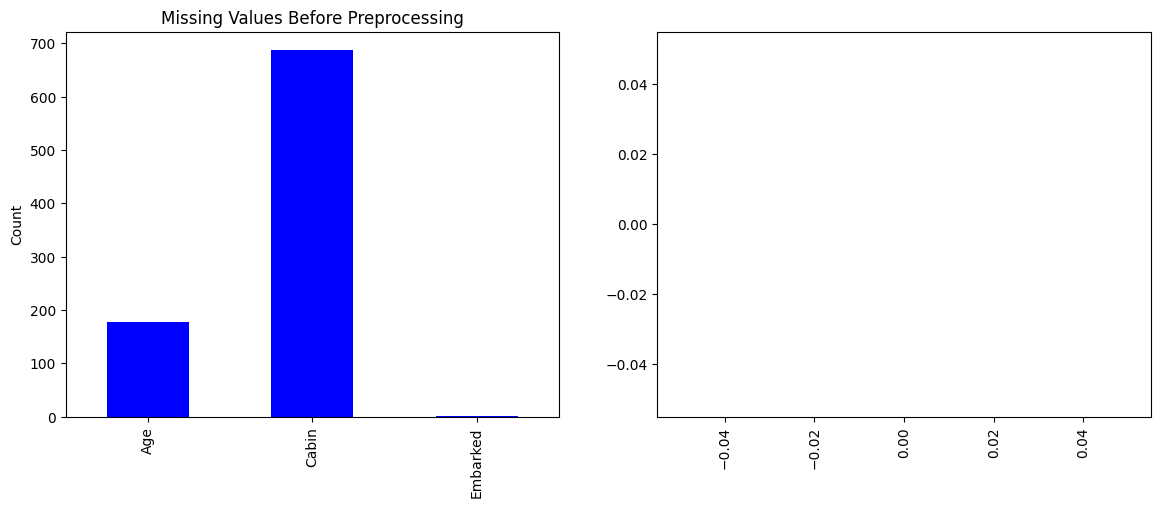

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the raw dataset again
raw_data = pd.read_csv('Titanic-Dataset.csv')

# Calculate missing values count before and after preprocessing
missing_before = raw_data.isnull().sum()
missing_after = data.isnull().sum()

# Plot missing values comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

missing_before[missing_before > 0].plot(kind="bar", ax=axes[0], color="blue")
axes[0].set_title("Missing Values Before Preprocessing")
axes[0].set_ylabel("Count")

missing_after[missing_after > 0].plot(kind="bar", ax=axes[1], color="red")
axes[1].set_title("Missing Values After Preprocessing")

plt.show()

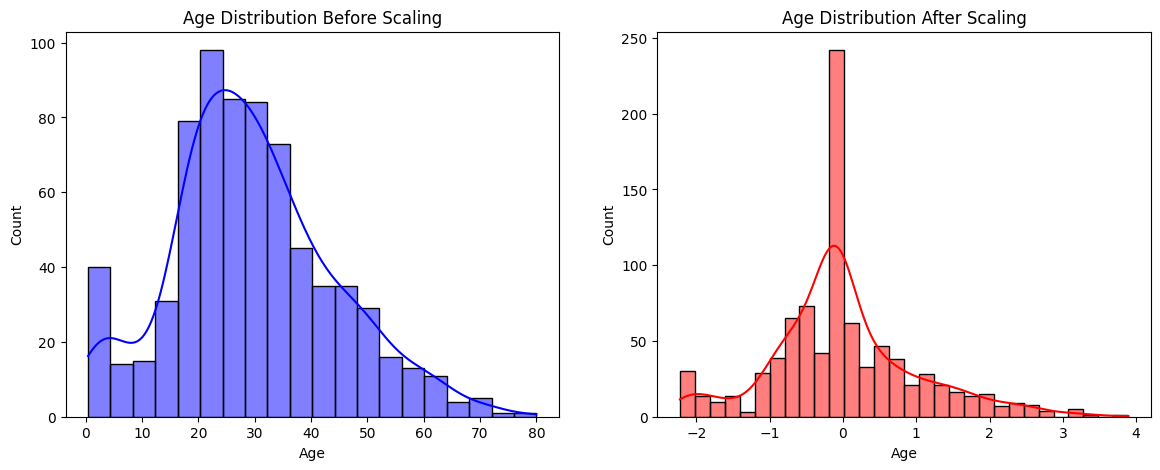

In [16]:
import seaborn as sns

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Age distribution before scaling
sns.histplot(raw_data['Age'].dropna(), kde=True, ax=axes[0], color='blue')
axes[0].set_title("Age Distribution Before Scaling")

# Age distribution after scaling
sns.histplot(data['Age'], kde=True, ax=axes[1], color='red')
axes[1].set_title("Age Distribution After Scaling")

plt.show()

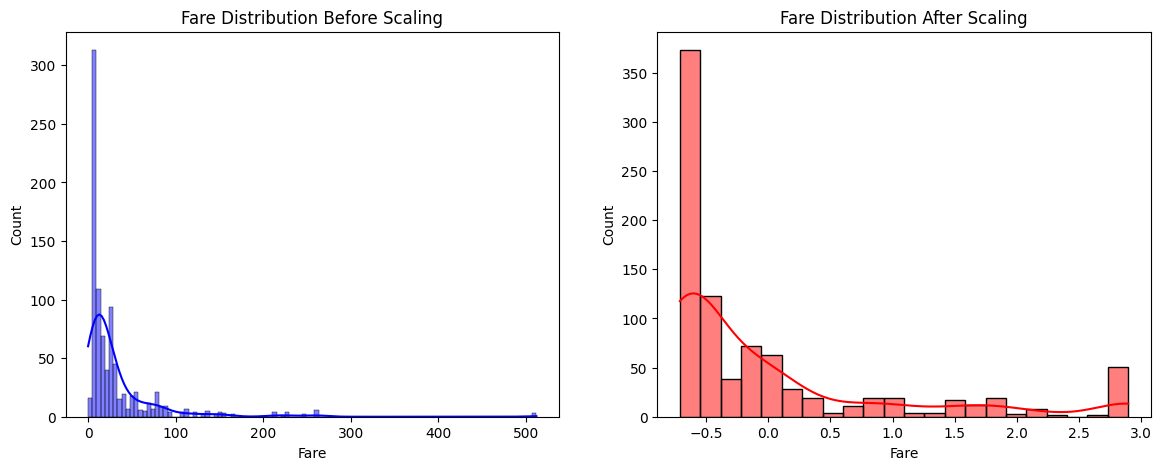

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(raw_data['Fare'].dropna(), kde=True, ax=axes[0], color='blue')
axes[0].set_title("Fare Distribution Before Scaling")

sns.histplot(data['Fare'], kde=True, ax=axes[1], color='red')
axes[1].set_title("Fare Distribution After Scaling")

plt.show()

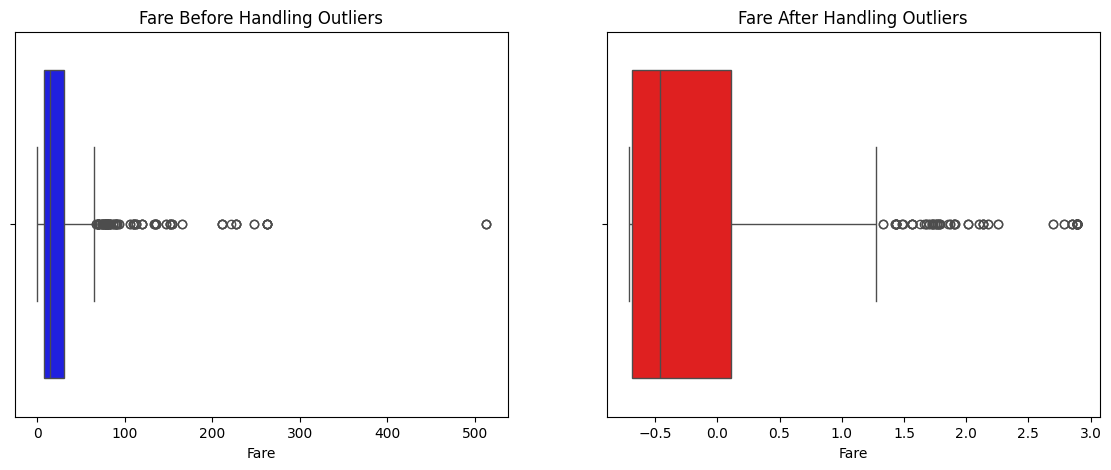

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before handling outliers
sns.boxplot(x=raw_data['Fare'], ax=axes[0], color='blue')
axes[0].set_title("Fare Before Handling Outliers")

# After handling outliers
sns.boxplot(x=data['Fare'], ax=axes[1], color='red')
axes[1].set_title("Fare After Handling Outliers")

plt.show()

C:\Users\skche\AppData\Local\Temp\ipykernel_8740\2911548434.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=raw_data['Sex'], ax=axes[0], palette="viridis")
C:\Users\skche\AppData\Local\Temp\ipykernel_8740\2911548434.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Sex_male'], ax=axes[1], palette="viridis")


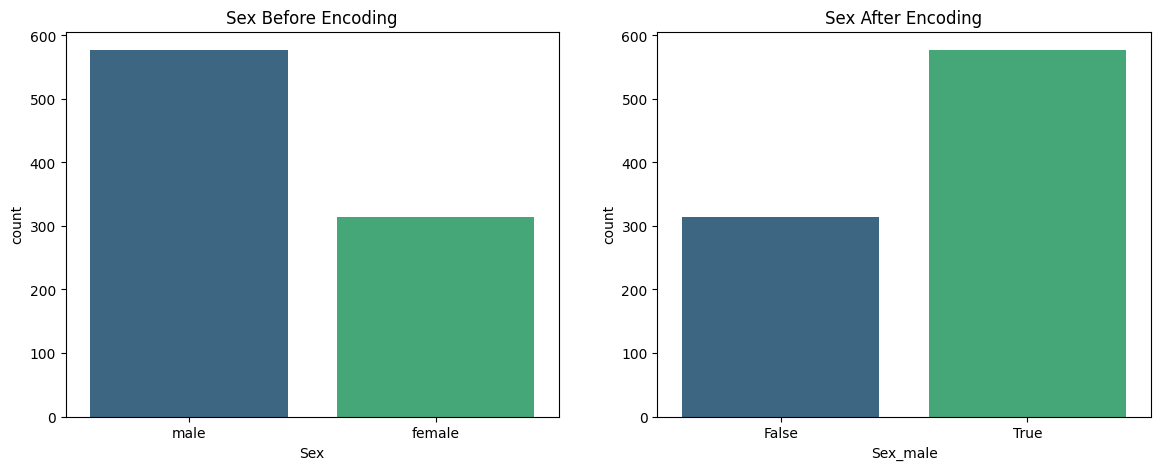

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before encoding
sns.countplot(x=raw_data['Sex'], ax=axes[0], palette="viridis")
axes[0].set_title("Sex Before Encoding")

# After encoding
sns.countplot(x=data['Sex_male'], ax=axes[1], palette="viridis")
axes[1].set_title("Sex After Encoding")

plt.show()

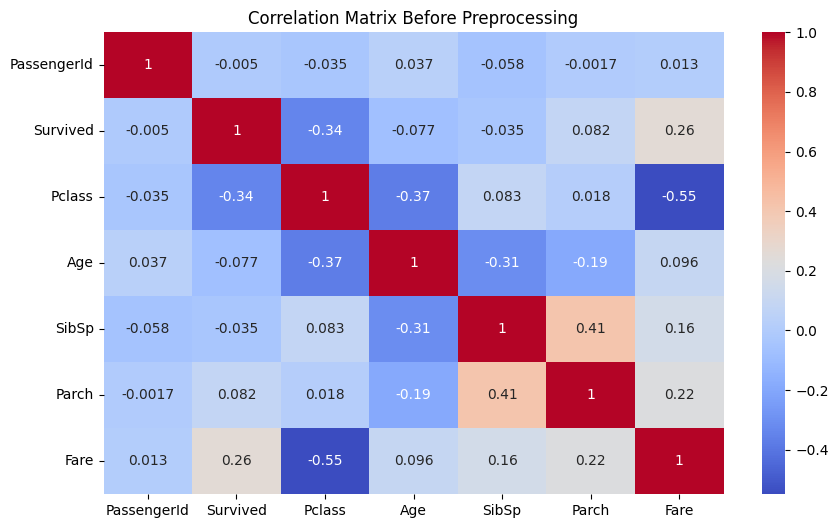

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 1000x600 with 0 Axes>

In [20]:
# Correlation before preprocessing
plt.figure(figsize=(10, 6))
sns.heatmap(raw_data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Before Preprocessing")
plt.show()

# Correlation after preprocessing
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix After Preprocessing")
plt.show()